### Sea level predictor
Dataset consisting of global sea levels (1880 - 2013).<br>
*Aim of this task was to show changes in global sea levels throughout the years and predict the sea levels changes through year 2050.*


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

**1. Importing the data**

In [67]:
df = pd.read_csv('datasets/epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


**2. Creating a scatterplot to see the sea level throughout the years.**

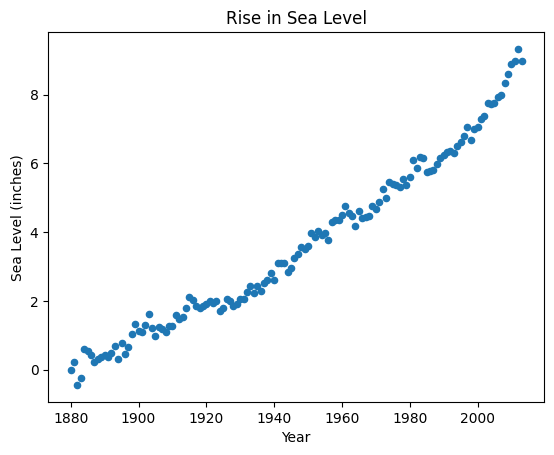

In [68]:
df.plot(x='Year', y='CSIRO Adjusted Sea Level', kind='scatter')
plt.xlabel('Year')  
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.show()

**3. Creating first line of best fit - getting slope and y-intercept through the year 2050 to predict rise of the sea level.**

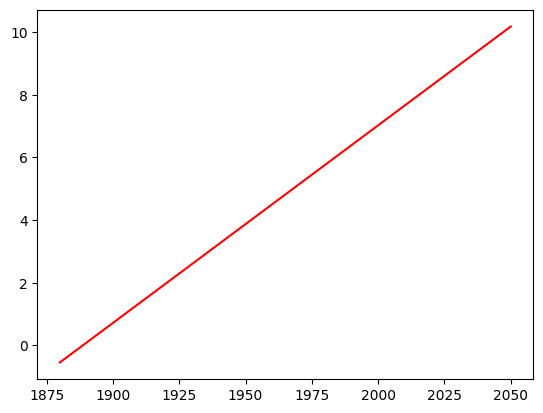

In [78]:
res = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
slope = res.slope
intercept = res.intercept

years = range(df['Year'].min(), 2051)

plt.plot(years, slope*years + intercept, 'r', label='fitted line 1')

**4. Creating a second line of best fit using data just from year 2000 through the most recent and further through the year 2050**<br>
*Predicting the sea level rise, if the rate of rise continues as it has since the year 2000.*

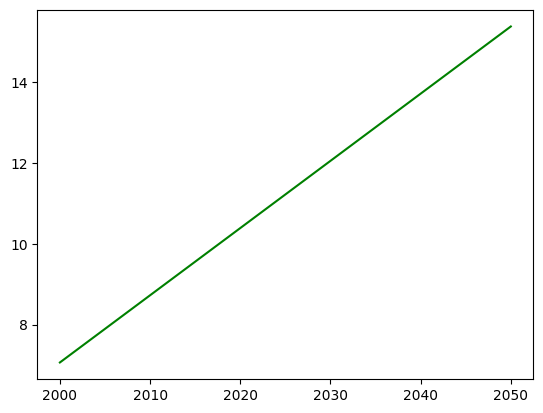

In [79]:
df2 = df[df['Year'] >= 2000]

res2 = linregress(df2['Year'], df2['CSIRO Adjusted Sea Level'])
slope2 = res2.slope
intercept2 = res2.intercept

years2 = range(2000, 2051)

plt.plot(years2, slope2*years2 + intercept2, 'g', label='fitted line 2')


**5. Creating final chart displaying measured sea levels sice 1880, predicted rise of the sea level through the yeaar 2050 (fitted line 1) and predicted rise of the sea level based od data since the year 2000.**

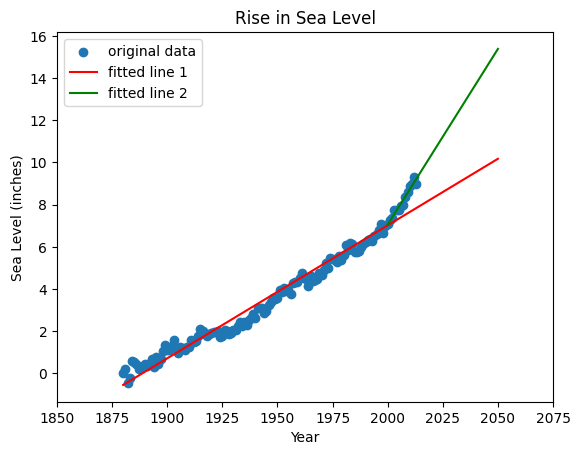

In [76]:
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='original data')
plt.plot(years, slope*years + intercept, 'r', label='fitted line 1')
plt.plot(years2, slope2*years2 + intercept2, 'g', label='fitted line 2')
plt.legend()
plt.xlabel('Year')
plt.xticks(np.arange(1850.0, 2076.0, 25.0))
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.show()